<a href="https://colab.research.google.com/github/domingues100/SEL0449---Computer-Vision/blob/main/Lista8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista de Exercício 8
### Processamento Digital de Imagens (SEL0449/SEL5895)

**Instruções:**

 1. Esta lista consiste de 2 exercícios.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Depois de terminado os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado, o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0449-SEL5895_2023/blob/main/praticas/Lista_de_Exercicio_8.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/praticas/Lista_de_Exercicio_8.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>


`Nome: `

`Número USP: `

### Introdução:

Vamos importar as bibliotecas que utilizaremos durante essa prática!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from scipy.io import loadmat
import cmath

#### **Atenção**: os códigos abaixo são para fazer o download das imagens (EXECUTE-OS). Os mesmos não fazem parte dessa prática.

In [ ]:
import urllib.request

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_08/circuit.tif", "circuit.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_08/lena.tif", "lena.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_08/H1.mat", "H1.mat")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_08/H2.mat", "H2.mat")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")


### 1) Restauração de imagem com borramento (Nota:5,0)

Em algumas situações, as imagens digitais são corrompidas por outros tipos de degradações, diferentes daqueles vistos na prática anterior, como o ruído Gaussiano e Poisson. Essas degradações, muitas vezes, são transferidas para as imagens no momento de aquisição, gerando um borramento ou sensação de movimento na imagem digitalizada.

Nessa prática, iremos trabalhar algumas técnicas de restauração para melhorar a qualidade da imagem para estas situações.

<center><img src="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_08/exercicio1.png" width="750" height="430"></center>

<center><caption><b> Figura 1:</b> Modelo de degradação utilizado na construção de "circuit_blur.tif".</b></caption></center>
<caption><center> </center></caption>

A situação acima mostra uma imagem sendo degradada no domínio da frequência por uma função de transferência $H(u,v)$ modelada a partir da seguinte equação, sendo $𝑘=5.10^{−4}$:

$$ 𝐻_{1}(𝑢,𝑣)=exp(−𝑘(𝑢^{2}+𝑣^{2})^{5/6}) $$

Diante disso, faça o que se pede:

1. Carregue a imagem "circuito.tif"
2. Agora, carregue a matriz de degradação "H1" que será aplicada na imagem. Para isso, utilizaremos a função "loadmat" disponibilizada na biblioteca "scipy.io". Utilize as linhas de código abaixo para realizar esse procedimento:
```python
DegradBlur = loadmat('H1.mat')
H1 = DegradBlur['H']
```

3. Utilize a função ```InsertDegBlur``` fornecida logo abaixo para aplicar  a degradação de borramento (Blur) na imagem, utilizando a matriz de degração $H_{1}$ carregada no item anterior. A função já está pronta, apenas comente as linhas de código da função ```InsertDegBlur``` para mostrar que você entendeu o que ela faz.
4. Mostre a imagem degradada e original lado a lado.
5. Aplique a transformada de Fourier na imagem degradada. Nesse momento, é importante a utilização do PADDING antes da transformada de Fourier. Para fins de padronização, utilize o padding simétrico de acordo com o código abaixo:
```python
img_pad = np.pad(img, (225, 225), 'symmetric')
imgPaddingF = np.fft.fft2(img_pad)
fshift = np.fft.fftshift(imgPaddingF)
```
6. Restaure a imagem degradada no domínio da frequência utilizando filtro inverso não limitado.
7. Visualize a imagem restaurada no item 1.6. e sua versão original. Comente os resultados.
8. Restaure a imagem degradada utilizando filtro inverso limitado com frequências de corte iguais a 300, 200 e 100 pixels. Pode-se limitar o filtro inverso implementando 𝐻(𝑢,𝑣)=1 para todas as frequências maiores que a determinada frequência de corte.
9. Visualizar as imagens restauradas e sua versão não degradada. Comentar os resultados.


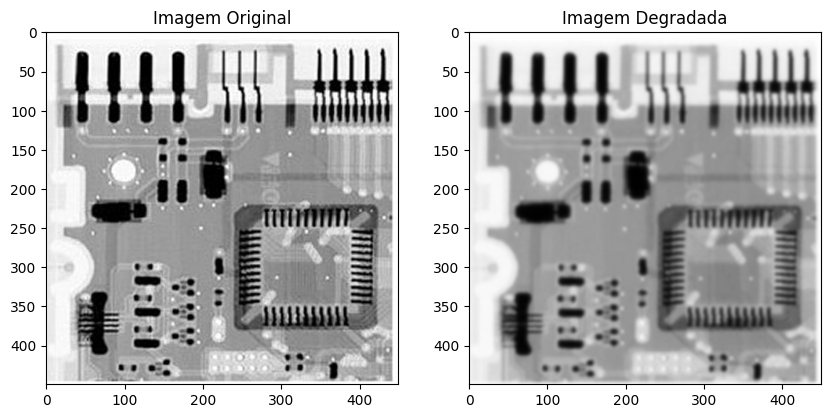

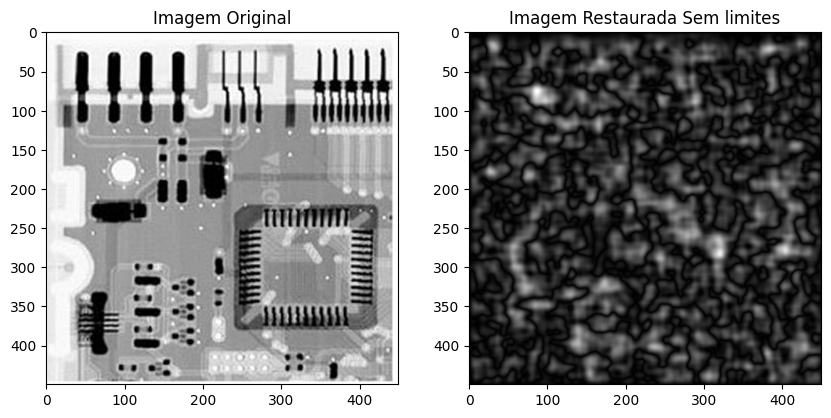

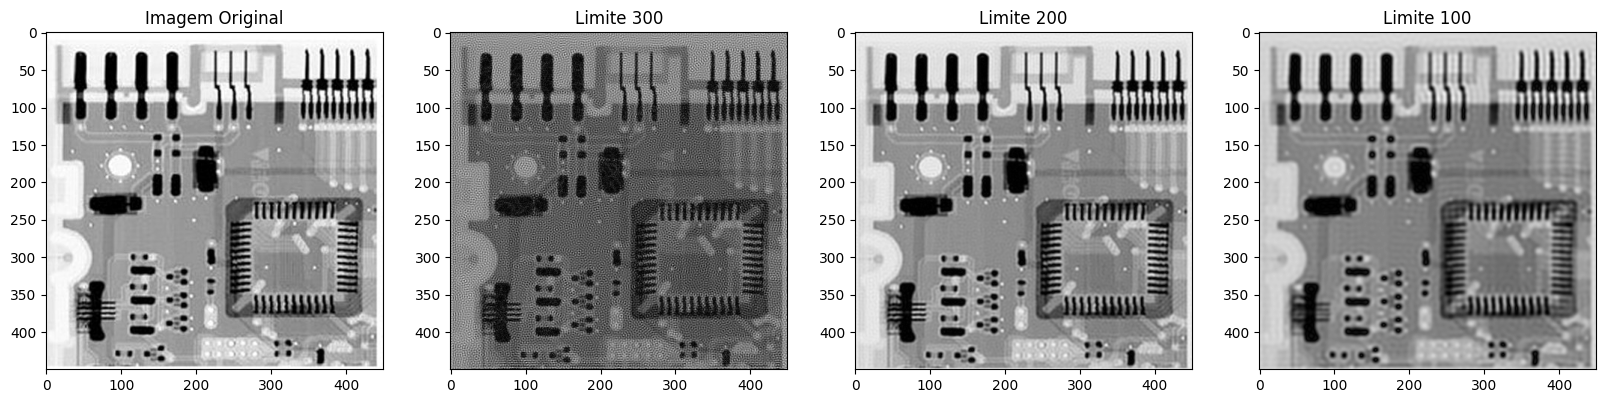

In [ ]:
def InsertDegBlur(img, H):
  '''
  Entrada:
    - img: Imagem de entrada.

  Saída:
    - imgNoisy: Imagem degradada.
  '''
  imgPadd = np.pad(img, (225, 225), 'symmetric')  # Preenche a imagem com uma borda simétrica de tamanho 225 pixels em todas as direções.
  imgF = np.fft.fft2(imgPadd)  # Aplica a transformada de Fourier bidimensional à imagem preenchida.
  fshift = np.fft.fftshift(imgF)  # Desloca o espectro da frequência para que as baixas frequências fiquem no centro da imagem.
  ImgDregF = fshift * H  # Multiplica o espectro da frequência pela função de degradação H.
  f_inverse = np.fft.ifftshift(ImgDregF)  # Aplica o deslocamento inverso do espectro da frequência.
  imgDreg = np.fft.ifft2(f_inverse)  # Aplica a transformada inversa de Fourier para obter a imagem degradada no domínio espacial.
  imgDreg = np.abs(imgDreg[224:674, 224:674])  # Extrai a região central da imagem degradada.
  imgDreg = imgDreg.astype('uint8')  # Converte a imagem degradada para o tipo de dados uint8.

  return imgDreg  # Retorna a imagem degradada.

## -- Seu código começa AQUI -- ##

def plot(imagens, titulos): #função para o plot
  plt.figure(figsize=(5*len(imagens),5)) #cria uma figura nx5
  for j in range(len(imagens)):
    plt.subplot(1,len(imagens),j+1)
    plt.title(f"{titulos[j]}")
    plt.imshow(imagens[j], 'gray')
  plt.show()

#1 - carregar a imagem
img = cv.imread("circuit.tif", cv.IMREAD_GRAYSCALE) #lê a imagem original

#2 - carregar a matriz
DegradBlur = loadmat('H1.mat')
H1 = DegradBlur['H']

#3 - usar a função já carregada
imgDegr = InsertDegBlur(img,H1)

#4 - plotar as imagens lado a lado
plot([img, imgDegr],["Imagem Original","Imagem Degradada"])

#5 - aplicar a transformada na imagem degradada
img_pad = np.pad(imgDegr, (225, 225), 'symmetric')
imgPaddingF = np.fft.fft2(img_pad)
fshift = np.fft.fftshift(imgPaddingF)

#6 - Restaure a imagem degradada no domínio da frequência utilizando filtro inverso não limitado.
F = (fshift/H1)

#7 - Visualize a imagem restaurada no item 1.6. e sua versão original
M2 = img.shape[0]
N2 = img.shape[1]
Mf2 = 2*M2
Nf2 = 2*N2
cx2 = Nf2//2
cy2 = Mf2//2

ifiltrado = np.fft.ifftshift(F)
ifiltrado = np.fft.ifft2(ifiltrado)
ifiltrado = np.abs(ifiltrado)
ifiltrado2 = ifiltrado[224:674,224:674]
print("\n")
plot([img,ifiltrado2],["Imagem Original", "Imagem Restaurada Sem limites"])

#8 - Restaure a imagem degradada utilizando filtro inverso limitado com frequências de corte iguais a 300, 200 e 100 pixels. Pode-se limitar o filtro inverso implementando 𝐻(𝑢,𝑣)=1 para todas as frequências maiores que a determinada frequência de corte.

def LIMITE(H):
  filtro = np.zeros((Mf2, Nf2))  # Cria matriz de zeros.
  ans = []  # Lista para resultados.
  for number in range(len(H)):  # Loop sobre H.
    H_novo = H1.copy()  # Copia de H1.
    for x in range(0, Mf2):  # Loop para x.
      for y in range(0, Nf2):  # Loop para y.
        if np.sqrt((x-cx2)**2+(y-cy2)**2) > H[number]:  # Verifica condição.
          H_novo[x, y] = 1  # Atribui 1.
    fshift_novo = fshift / H_novo  # Divide fshift.
    ifiltrado_novo = np.fft.ifftshift(fshift_novo)  # Desloca inverso.
    ifiltrado_novo = np.fft.ifft2(ifiltrado_novo)  # Inversa.
    ifiltrado_novo = np.abs(ifiltrado_novo)  # Valor absoluto.
    ifiltrado_novo = ifiltrado_novo[224:674, 224:674]  # Seleção região central.
    ans.append(ifiltrado_novo)  # Adiciona resultado.
  return ans  # Retorna resultados.

restaura = LIMITE([300, 200, 100])

#9 - Visualizar as imagens restauradas e sua versão não degradada. Comentar os resultados.
print("\n")
plot([img, restaura[0], restaura[1], restaura[2]],["Imagem Original", "Limite 300", "Limite 200", "Limite 100"])
## -- Seu código termina AQUI -- ##

## Comentários: Perceba que quando o limite 200 a imagem fica mais parecida com a original. Para 300 a imagem fica mais escura, como era esperado. E para 100, a imagem fica mais borrada.
#Quando a imagem não é limitada, ela fica estranha, mas era o esperado.

### 2) Restauração de imagem com borramento e movimento (Nota:5,0)

<center><img src="
https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_08/exercicio2.png" width="750" height="430"></center>

<center><caption><b> Figura 2:</b> Modelo de degradação utilizado para a construção de "lena_deg.tif".</b></caption></center>
<caption><center> </center></caption>

A imagem foi degradada por uma função de espalhamento de ponto e movimento construídos a partir das seguintes equações:

$$ 𝐻_{2}(𝑢,𝑣)=H_{blur}(u,v).H_{motion}(u,v) $$

$$ H_{blur}(u,v)=exp(−𝑘(𝑢^{2}+𝑣^{2})^{5/6}) $$

$$ H_{motion}(u,v) = 𝛾 . sinc(𝛼u + 𝛽v).exp(-j \pi(𝛼u + 𝛽v) ) $$

Sendo $𝑘=5.10^{−5}$, $𝛼=−6.10^{−3}$, $𝛽=4.10^{−3}$ e $𝛾=1$. A imagem foi também corrompida por ruído aditivo gaussiano com variância igual a $𝜎^{2}≅6,5$. Diante disso, siga os passos abaixo:

1. Carregue a imagem "lena.tif"
2. Agora, carregue a matriz de degradação "H2" que será aplicada na imagem.
3. Utilize a função ```InsertDegMotion``` fornecida logo abaixo para aplicar  a degradação de borramento (Blur) e movimento na imagem, utilizando a matriz de degração "$H_{2}$" carregada no item anterior. A função já está pronta, apenas comente as linhas de código da função ```InsertDegMotion``` para mostrar que você entendeu o que ela faz.
4. Mostre a imagem degradada e original lado a lado.
5. Aplique a transformada de Fourier na imagem degradada. Nesse momento, é importante a utilização do PADDING antes da transformada de Fourier. Para fins de padronização, utilize o padding simétrico de acordo com o código abaixo:
```python
img_pad = np.pad(img, (256, 256), 'symmetric')
imgPaddingF = np.fft.fft2(img_pad)
fshift = np.fft.fftshift(imgPaddingF)
```
6. Restaure a imagem degradada no domínio da frequência utilizando filtro inverso não limitado.
7. Visualize a imagem restaurada no item 2.6. e sua versão original. Comentar os resultados.
8. Restaure a imagem degradada utilizando filtro inverso limitado com frequências de corte iguais a 200, 100 e 50. Pode-se limitar o filtro inverso implementando 𝐻(𝑢,𝑣)=1 para todas as frequências maiores que a determinada frequência de corte.
9. Visualizar as imagens restauradas e sua versão não degradada. Comentar os resultados;
10. Restaure a imagem degradada utilizando filtro de Wiener com parâmetro $𝐾=3.10^{-3}$. Abaixo, segue a fórmula do filtro:

$$ Img_{Wiener}(u,v) = I(u,v).H_{Wiener}(u,v)$$

$$ H_{Wiener}(u,v) =  \frac{1}{|H(u,v)|}. \frac{|H(u,v)|^{2}}{(|H(u,v)|^{2} + K)}       $$

em que $H(u,v)$ é a função degradação.
11. Comente sobre a diferenças de resultado no processo de filtragem do item 2.8 e 2.10.




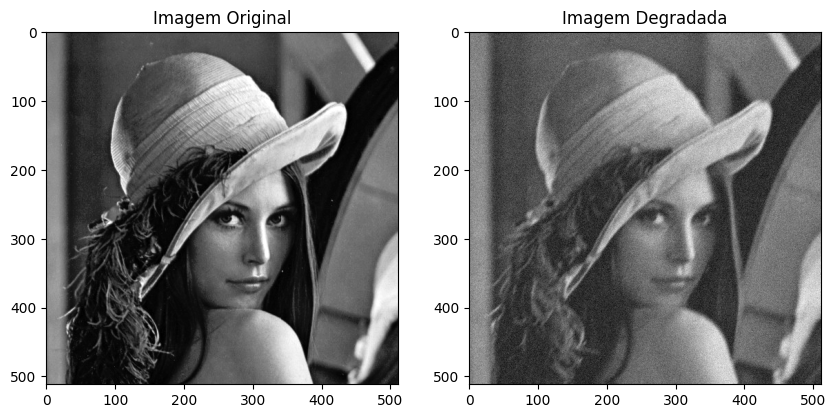

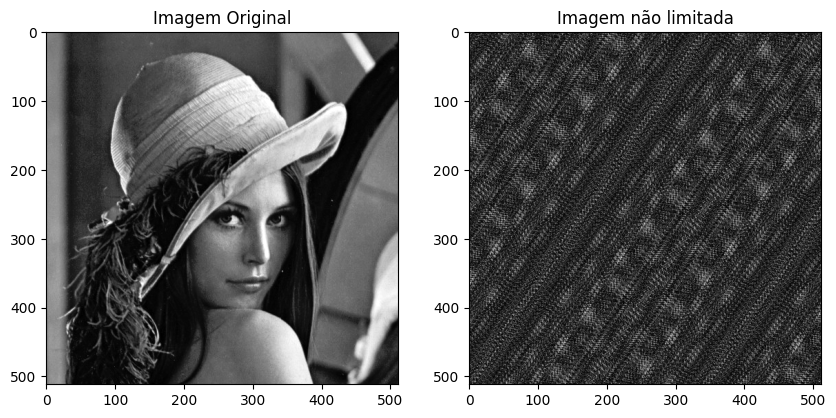

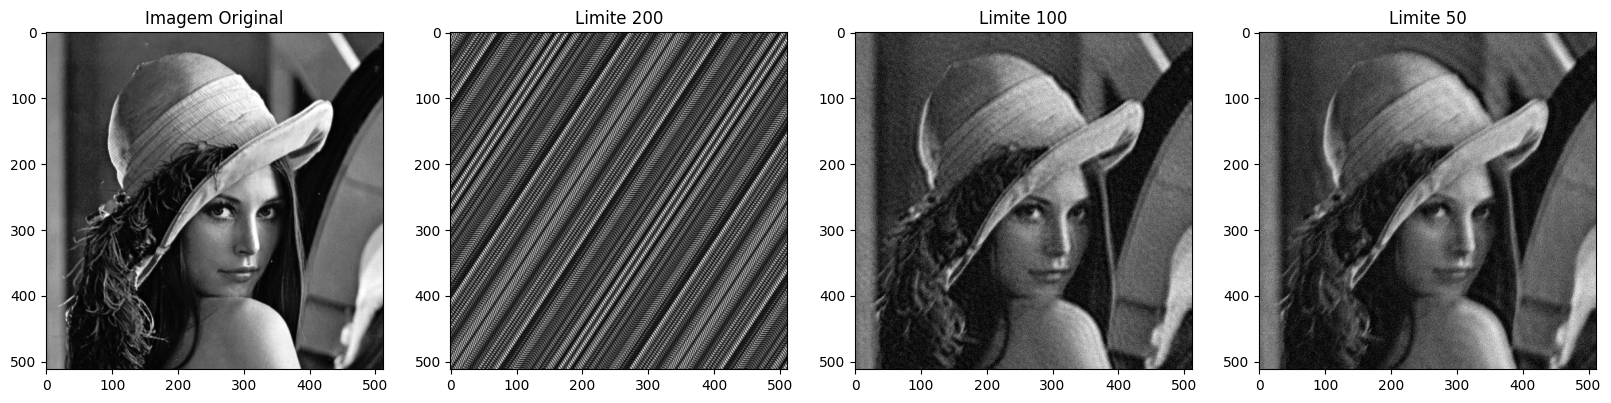

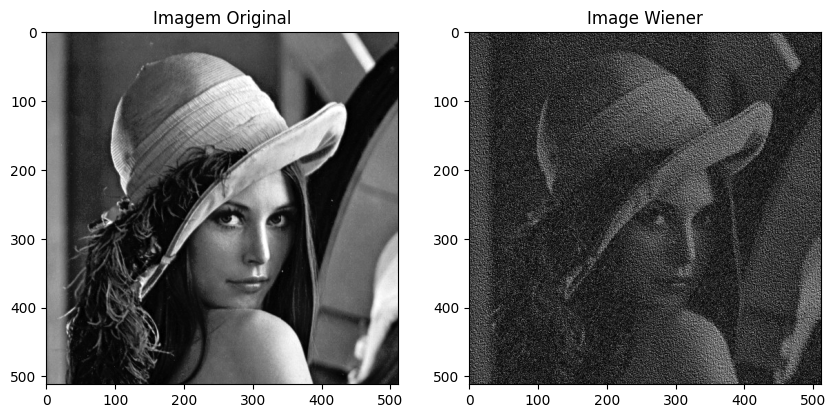

In [ ]:
def InsertDegMotion(img, H):
  '''
  Entrada:
    - img: Imagem de entrada.

  Saída:
    - imgNoisy: Imagem degradada.
  '''
  nRowsOri, nColsOri = img.shape  # Tamanho da imagem original.
  imgPadd = np.pad(img, (256, 256), 'symmetric')  # Preencher imagem com borda simétrica.
  imgF = np.fft.fft2(imgPadd)  # Transformada de Fourier bidimensional.
  fshift = np.fft.fftshift(imgF)  # Deslocamento do espectro da frequência.
  ImgDregF = fshift * H  # Multiplicação do espectro pela função degradação.
  f_inverse = np.fft.ifftshift(ImgDregF)  # Deslocamento inverso do espectro.
  imgDreg = np.fft.ifft2(f_inverse)  # Transformada inversa de Fourier.
  imgDreg = np.abs(imgDreg[255:767, 255:767])  # Extração da região central.
  imgDreg = imgDreg.astype('uint8')  # Conversão para tipo de dados uint8.
  noise = 15 * np.random.normal(size=(nRowsOri, nColsOri)).astype(float)  # Geração de ruído aleatório.
  imgDreg = imgDreg + noise  # Adição do ruído à imagem.
  return imgDreg  # Retorno da imagem degradada com ruído.

## -- Seu código começa AQUI -- ##
#1 - Carregue a imagem "lena.tif"
img2 = cv.imread("lena.tif", cv.IMREAD_GRAYSCALE) #lê a imagem original

#2 - Agora, carregue a matriz de degradação "H2" que será aplicada na imagem.
DegradBlur = loadmat('H2.mat')
H_lena = DegradBlur['H']

#3 - Utilize a função InsertDegMotion fornecida logo abaixo para aplicar a degradação de borramento (Blur) e movimento na imagem, utilizando a matriz de degração " H2 " carregada no item anterior. A função já está pronta, apenas comente as linhas de código da função InsertDegMotion para mostrar que você entendeu o que ela faz.
imgDegr = InsertDegMotion(img2,H_lena)

#4 - Mostre a imagem degradada e original lado a lado.
plot([img2,imgDegr],["Imagem Original", "Imagem Degradada"])

#5 - Aplique a transformada de Fourier na imagem degradada. Nesse momento, é importante a utilização do PADDING antes da transformada de Fourier. Para fins de padronização, utilize o padding simétrico de acordo com o código abaixo:
img_pad = np.pad(imgDegr, (256, 256), 'symmetric')
imgPaddingF = np.fft.fft2(img_pad)
fshift = np.fft.fftshift(imgPaddingF)

#6- Restaure a imagem degradada no domínio da frequência utilizando filtro inverso não limitado.
F = (fshift/H_lena)
M2 = img2.shape[0]
N2 = img2.shape[1]
Mf2 = 2*M2
Nf2 = 2*N2
cx2 = Nf2//2
cy2 = Mf2//2

ifiltrado = np.fft.ifftshift(F)
ifiltrado = np.fft.ifft2(ifiltrado)
ifiltrado = np.abs(ifiltrado)
ifiltrado2 = ifiltrado[255:767, 255:767]

#7 - Visualize a imagem restaurada no item 2.6. e sua versão original. Comentar os resultados.
print("\n")
plot([img2, ifiltrado2],["Imagem Original", "Imagem não limitada"])

#8 - Restaure a imagem degradada utilizando filtro inverso limitado com frequências de corte iguais a 200, 100 e 50. Pode-se limitar o filtro inverso implementando 𝐻(𝑢,𝑣)=1 para todas as frequências maiores que a determinada frequência de corte.
def LIMITE(H):
  filtro = np.zeros((Mf2, Nf2))  # Cria matriz de zeros.
  ans = []  # Lista para resultados.
  for number in range(len(H)):  # Loop sobre H.
    H_novo = H_lena.copy()  # Copia de H1.
    for x in range(0, Mf2):  # Loop para x.
      for y in range(0, Nf2):  # Loop para y.
        if np.sqrt((x-cx2)**2+(y-cy2)**2) > H[number]:  # Verifica condição.
          H_novo[x, y] = 1  # Atribui 1.
    fshift_novo = fshift / H_novo  # Divide fshift.
    ifiltrado_novo = np.fft.ifftshift(fshift_novo)  # Desloca inverso.
    ifiltrado_novo = np.fft.ifft2(ifiltrado_novo)  # Inversa.
    ifiltrado_novo = np.abs(ifiltrado_novo[255:767, 255:767] )  # Valor absoluto.
    ans.append(ifiltrado_novo)  # Adiciona resultado.
  return ans  # Retorna resultados.

resultado2 = LIMITE([200, 100, 50])
#9 - Visualizar as imagens restauradas e sua versão não degradada. Comentar os resultados;
print("\n")
plot([img2, resultado2[0], resultado2[1], resultado2[2]],["Imagem Original", "Limite 200", "Limite 100", "Limite 50"])

#10 - Restaure a imagem degradada utilizando filtro de Wiener com parâmetro  K=3.10−3 . Abaixo, segue a fórmula do filtro

Hwiener = (abs(H_lena)**2 / ((abs(H_lena))**2+(3*(10**(-3)))))*(1/abs(H_lena)) #H para wiener
img_wiener = (fshift*Hwiener) #restauração
ifiltrado_wiener = np.fft.ifftshift(img_wiener)  # Desloca inverso.
ifiltrado_wiener = np.fft.ifft2(ifiltrado_wiener)  # Inversa.
ifiltrado_wiener = np.abs(ifiltrado_wiener[255:767, 255:767])  # Valor absoluto.

print("\n")
plot([img2, ifiltrado_wiener],["Imagem Original", "Image Wiener"])
## -- Seu código termina AQUI -- ##

## Comentários: A imagem filtrada no item 2.8 varia com o limite aplicado ao filtro, mas vemos uma imagem que apesar de filtrada ainda apresenta alguns "borrões".
#Já para o filtro de wiener, esses borrões são tratados, mas a imagem fica com outro problema, uma aspecto mais "enrrugado". Claro que, a função de degradação aparesentava várias tipos de rúido, sendo assim,
#cada filtro retirou alguns desses ruídos deixando outros. Por isso os resultados são diferentes. No filtro de wiener, o valor de K deve ser ajustado empiricamente para melhorar o resultado.